# Climatology
A climatology is an estimate of seasonal average values for a phenomenon averaged over a long period. Examples considered here are either monthly or daily (based on the day of the year). Note that the number of samples for the daily case is not very high unless some additional windowing is done around each day of the year, borrowing from neighboring days. That is what the argument nsmooth does. The following analysis uses 12 years of water temperature data and smooths over a window of 7 days.

The climatology object in this case will be a DataFrame with an integer 1-based index representing day of the year. To compare it to the original series, which has a DatetimeIndex, the function [apply_climatology](../_autosummary/vtools.apply_climatology.rst) applies the integer climatology onto the indicated index -- in this case it is that of the original time series. Visually, the climatology explains a great deal of the variation in the temperature data, and this is typicle. 

              value
dayofyear          
1          8.343067
2          8.316163
3          8.342859
4          8.453883
5          8.439230
...             ...
361        8.786435
362        8.695428
363        8.665833
364        8.581748
365        8.450023

[365 rows x 1 columns]


<AxesSubplot:xlabel='datetime', ylabel='Deg C'>

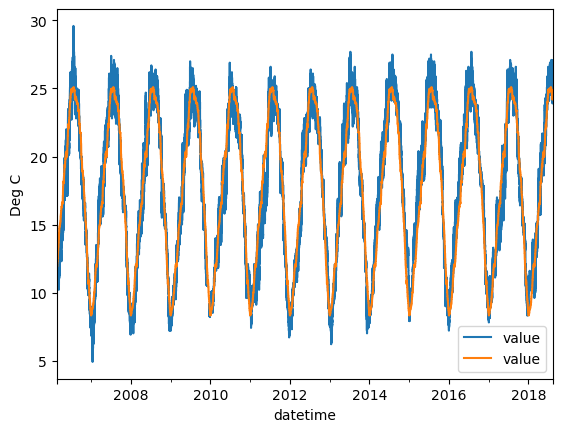

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
from vtools import climatology, apply_climatology, climatology_quantiles

df = pd.read_csv("data/mup_temp_2006_2018.csv",index_col=0,parse_dates=[0])  # water temperature time series
clim = climatology(df,freq="day",nsmooth=15) # smooths fortnightly variaiton and higher frequencies
print(clim)
ts_clim = apply_climatology(clim,df.index)

ax=df.plot()
ax.set_ylabel("Deg C")
ts_clim.plot(ax=ax)


##

## Estimating quantiles
The function [climatology_quantiles](../_autosummary/vtools.climatology_quantiles.rst) is still in development (it doesn't handle the beginning or end of the year). It applies quantiles on a daily basis using a window (usually odd numbered for centeredness) to gather statistical strength. 

Text(0, 0.5, 'Deg C')

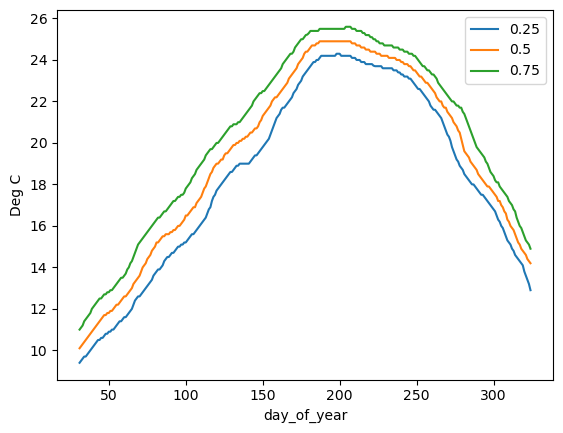

In [45]:

qlim = climatology_quantiles(df, min_day_year=31, max_day_year=325, window_width=21, quantiles=(0.25,0.5,0.75))

qlim.plot()
plt.ylabel("Deg C")